Enter latitude:  20.296059
Enter longitude:  85.824539
Enter height from sea level:  20


Predicting seismic hazard...
Fetching data...
Analyzing recent earthquakes...
Plotting seismic activity...


C:\Users\santo\AppData\Local\Temp\ipykernel_6380\52793105.py:55: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(quake['properties']['time'] / 1000) for quake in data['features']]


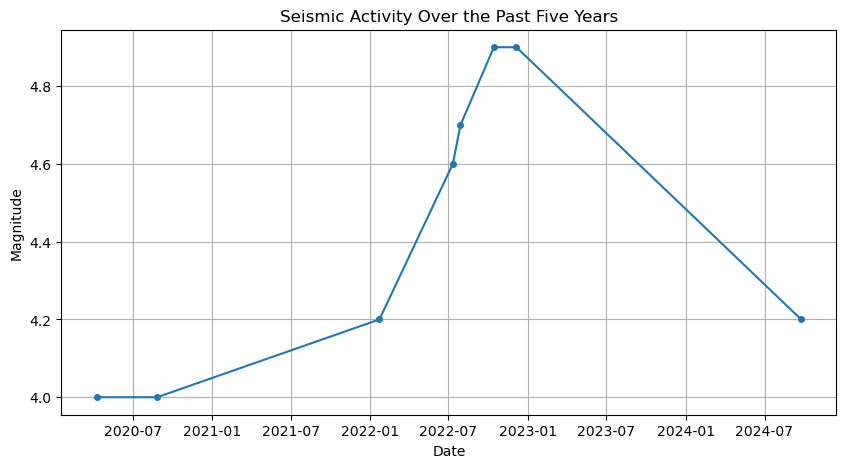

Recent seismic activity is moderate.


Do you want to enter another location? (yes/no):  no


In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to fetch data from the USGS API
def fetch_data(latitude, longitude, depth, start_date, end_date):
    url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
    params = {
        'format': 'geojson',
        'starttime': start_date,
        'endtime': end_date,
        'minmagnitude': '4.0',
        'latitude': str(latitude),
        'longitude': str(longitude),
        'maxradiuskm': '500',
        'orderby': 'time'
    }
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f"Error: Received status code {response.status_code}")
        print("Response content:", response.text)
        return None
    
    try:
        data = response.json()
    except requests.exceptions.JSONDecodeError:
        print("Error: Failed to decode JSON from response")
        print("Response content:", response.text)
        return None
    
    return data

# Function to evaluate recent past seismic activity
def recent_earthquake_analysis(data):
    if not data or 'features' not in data or not data['features']:
        return "No recent earthquakes found in the vicinity."

    recent_earthquakes = data['features']
    recent_mags = [quake['properties']['mag'] for quake in recent_earthquakes]
    
    average_mag = np.mean(recent_mags)
    if average_mag > 5.0:
        return "Recent seismic activity detected. Increased vigilance is recommended."
    else:
        return "Recent seismic activity is moderate."

# Function to plot seismic activity over the past five years
def plot_seismic_activity(data):
    if not data or 'features' not in data or not data['features']:
        print("No data available to plot.")
        return

    dates = [datetime.utcfromtimestamp(quake['properties']['time'] / 1000) for quake in data['features']]
    magnitudes = [quake['properties']['mag'] for quake in data['features']]

    plt.figure(figsize=(10, 5))
    plt.plot(dates, magnitudes, 'o-', markersize=4)
    plt.xlabel('Date')
    plt.ylabel('Magnitude')
    plt.title('Seismic Activity Over the Past Five Years')
    plt.grid(True)
    plt.show()

# Function to predict seismic hazard
def predict_seismic_hazard(latitude, longitude, depth):
    print("Fetching data...")
    end_date = datetime.now().strftime('%Y-%m-%d')
    start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')
    data = fetch_data(latitude, longitude, depth, start_date, end_date)
    
    if data is None:
        return "Error: Failed to fetch seismic data. Please check the input values or try again later."
    
    print("Analyzing recent earthquakes...")
    recent_earthquake_assessment = recent_earthquake_analysis(data)
    
    print("Plotting seismic activity...")
    plot_seismic_activity(data)
    
    return recent_earthquake_assessment

# Main program loop to accept user input and make predictions
while True:
    try:
        latitude = float(input("Enter latitude: "))
        longitude = float(input("Enter longitude: "))
        depth = float(input("Enter height from sea level: "))
        
        print("Predicting seismic hazard...")
        hazard_prediction = predict_seismic_hazard(latitude, longitude, depth)
        print(hazard_prediction)
    except Exception as e:
        print(f"An error occurred: {e}")
    
    cont = input("Do you want to enter another location? (yes/no): ")
    if cont.lower() != 'yes':
        break
